In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score,mean_absolute_error,r2_score,precision_score,recall_score,f1_score,confusion_matrix
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [17]:
df=pd.read_csv("/content/Banglore_traffic_Dataset.csv")

In [ ]:
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [18]:
df.columns

Index(['Date', 'Area Name', 'Road/Intersection Name', 'Traffic Volume',
       'Average Speed', 'Travel Time Index', 'Congestion Level',
       'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact',
       'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage',
       'Pedestrian and Cyclist Count', 'Weather Conditions',
       'Roadwork and Construction Activity'],
      dtype='object')

In [20]:
df.dtypes

,0
Date,object
Area Name,object
Road/Intersection Name,object
Traffic Volume,int64
Average Speed,float64
Travel Time Index,float64
Congestion Level,float64
Road Capacity Utilization,float64
Incident Reports,int64
Environmental Impact,float64


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

In [22]:
df.isnull().sum()

,0
Date,0
Area Name,0
Road/Intersection Name,0
Traffic Volume,0
Average Speed,0
Travel Time Index,0
Congestion Level,0
Road Capacity Utilization,0
Incident Reports,0
Environmental Impact,0


In [23]:
df = df.dropna()

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
df.describe()

,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count
count,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000
mean,29236.048120,39.447427,1.375554,80.818041,92.029215,1.570389,108.472096,45.086651,79.950243,75.155597,114.533348
std,13001.808801,10.707244,0.165319,23.533182,16.583341,1.420047,26.003618,20.208460,11.585006,14.409394,36.812573
min,4233.000000,20.000000,1.000039,5.160279,18.739771,0.000000,58.466000,10.006853,60.003933,50.020411,66.000000
25%,19413.000000,31.775825,1.242459,64.292905,97.354990,0.000000,88.826000,27.341191,69.828270,62.545895,94.000000
50%,27600.000000,39.199368,1.500000,92.389018,100.000000,1.000000,105.200000,45.170684,79.992773,75.317610,102.000000
75%,38058.500000,46.644517,1.500000,100.000000,100.000000,2.000000,126.117000,62.426485,89.957358,87.518589,111.000000
max,72039.000000,89.790843,1.500000,100.000000,100.000000,10.000000,194.078000,79.979744,99.993652,99.995049,243.000000


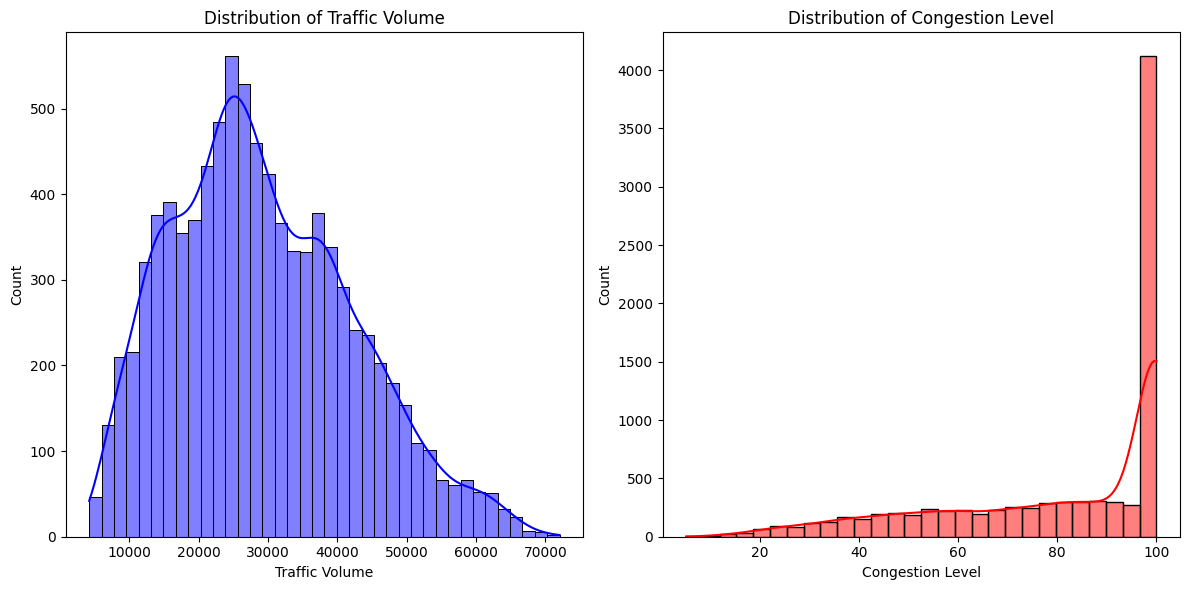

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Traffic Volume'], kde=True, color='blue')
plt.title('Distribution of Traffic Volume')
plt.subplot(1, 2, 2)
sns.histplot(df['Congestion Level'], kde=True, color='red')
plt.title('Distribution of Congestion Level')

plt.tight_layout()
plt.show()

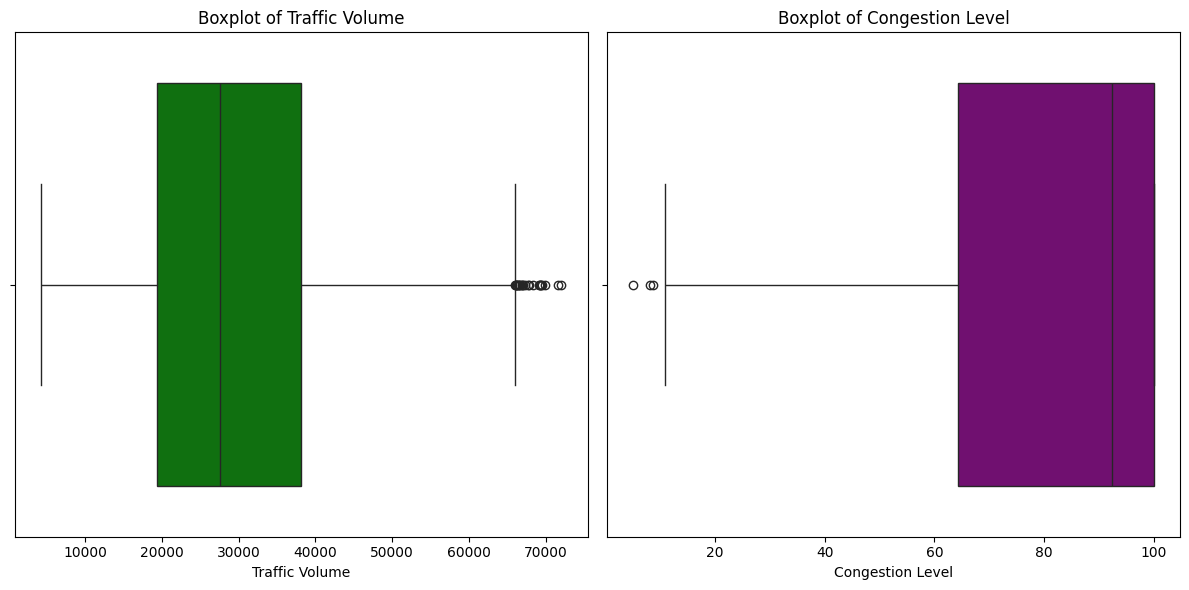

In [28]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Traffic Volume'], color='green')
plt.title('Boxplot of Traffic Volume')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Congestion Level'], color='purple')
plt.title('Boxplot of Congestion Level')

plt.tight_layout()
plt.show()


<ipython-input-29-c8d40a57cd26>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Area Name'], palette='Set2')
<ipython-input-29-c8d40a57cd26>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Weather Conditions'], palette='Set2')
<ipython-input-29-c8d40a57cd26>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Roadwork and Construction Activity'], palette='Set2')


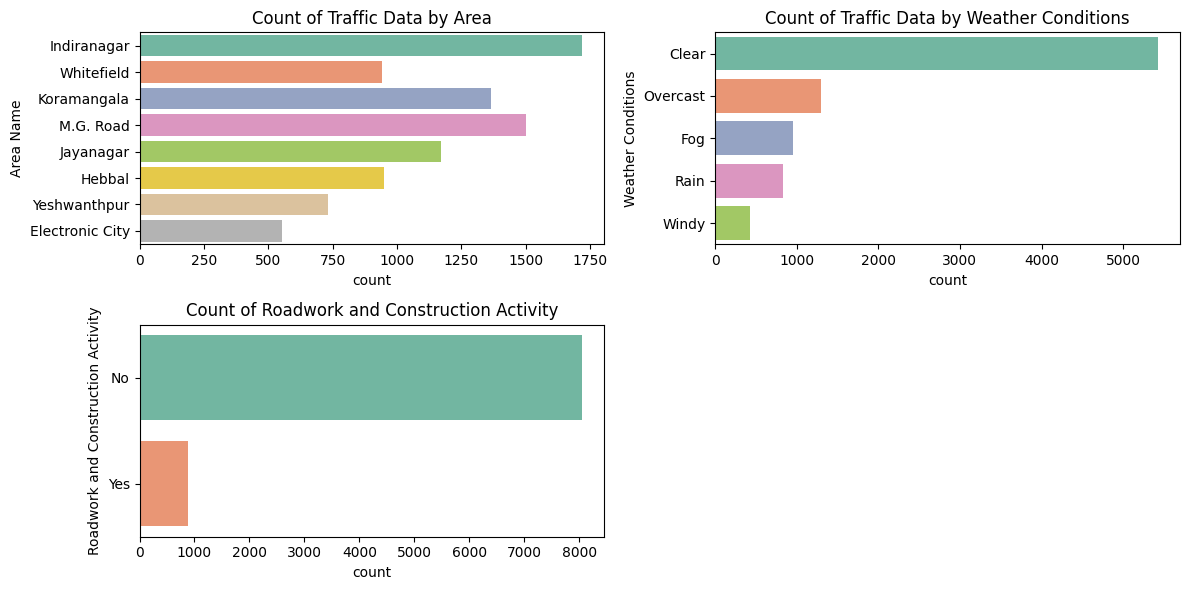

In [29]:

plt.figure(figsize=(12, 6))


plt.subplot(2, 2, 1)
sns.countplot(y=df['Area Name'], palette='Set2')
plt.title('Count of Traffic Data by Area')

plt.subplot(2, 2, 2)
sns.countplot(y=df['Weather Conditions'], palette='Set2')
plt.title('Count of Traffic Data by Weather Conditions')

plt.subplot(2, 2, 3)
sns.countplot(y=df['Roadwork and Construction Activity'], palette='Set2')
plt.title('Count of Roadwork and Construction Activity')

plt.tight_layout()
plt.show()


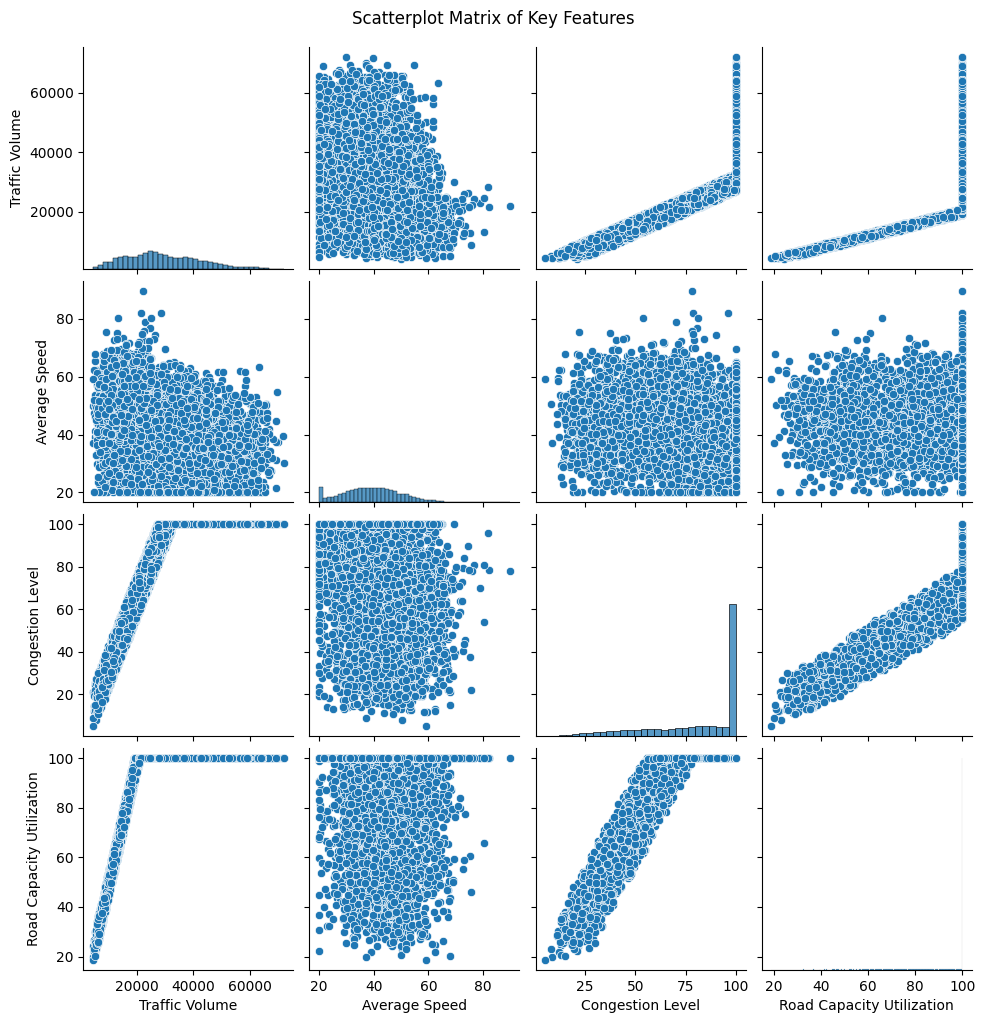

In [30]:
sns.pairplot(df[['Traffic Volume', 'Average Speed', 'Congestion Level', 'Road Capacity Utilization']])
plt.suptitle('Scatterplot Matrix of Key Features', y=1.02)
plt.show()


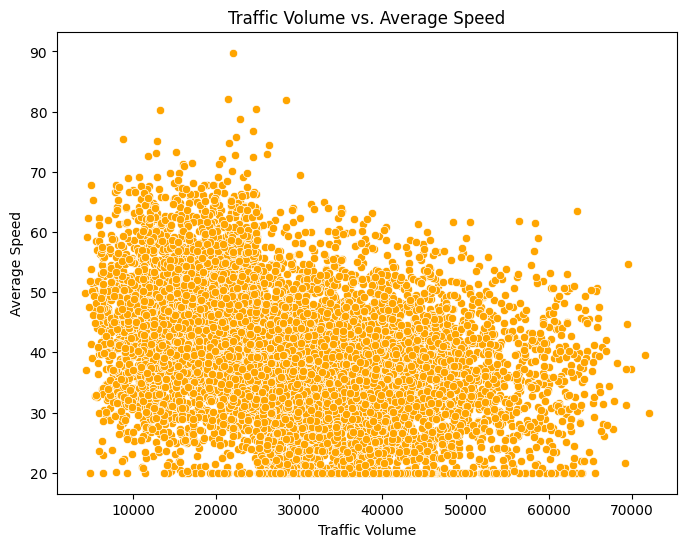

In [31]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Traffic Volume'], y=df['Average Speed'], color='orange')
plt.title('Traffic Volume vs. Average Speed')
plt.xlabel('Traffic Volume')
plt.ylabel('Average Speed')
plt.show()


<ipython-input-32-905a973106c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Area Name', y='Traffic Volume', data=df, palette='Set2')


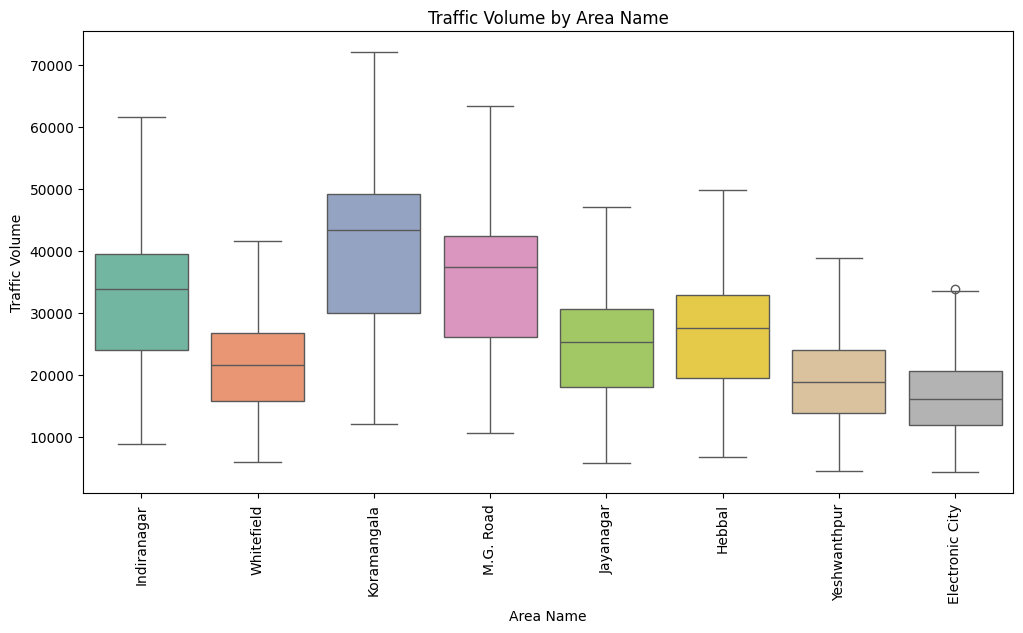

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Area Name', y='Traffic Volume', data=df, palette='Set2')
plt.title('Traffic Volume by Area Name')
plt.xticks(rotation=90)
plt.show()



<ipython-input-33-b021485556c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Area Name', y='Congestion Level', data=df, palette='Set2')


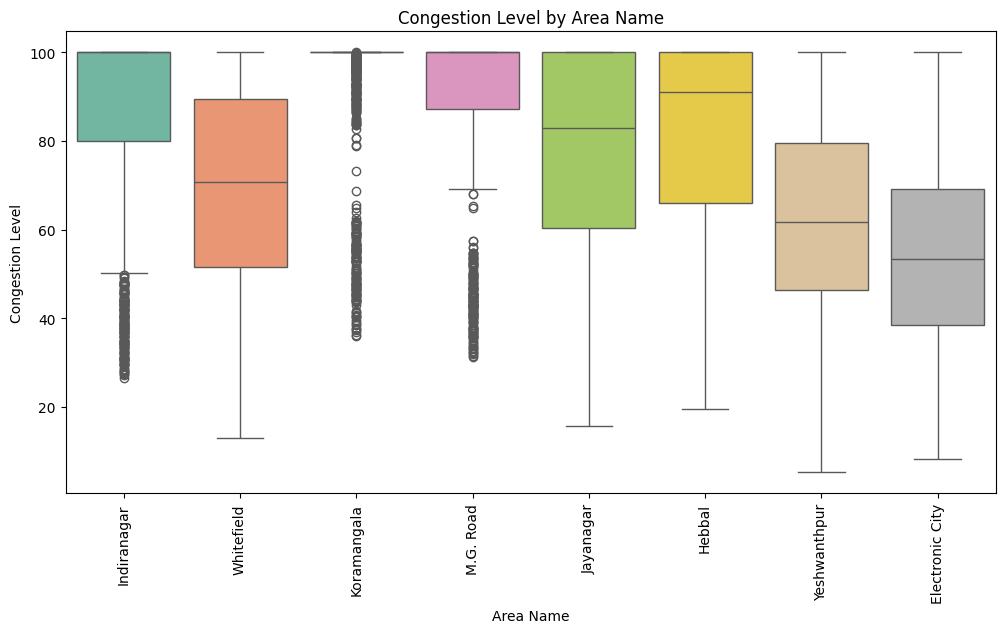

In [33]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Area Name', y='Congestion Level', data=df, palette='Set2')
plt.title('Congestion Level by Area Name')
plt.xticks(rotation=90)
plt.show()

<ipython-input-34-46503f2dcb5f>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_outliers = df.groupby('Area Name').apply(remove_outliers).reset_index(drop=True)
<ipython-input-34-46503f2dcb5f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Area Name', y='Congestion Level', data=df_no_outliers, palette='Set2')


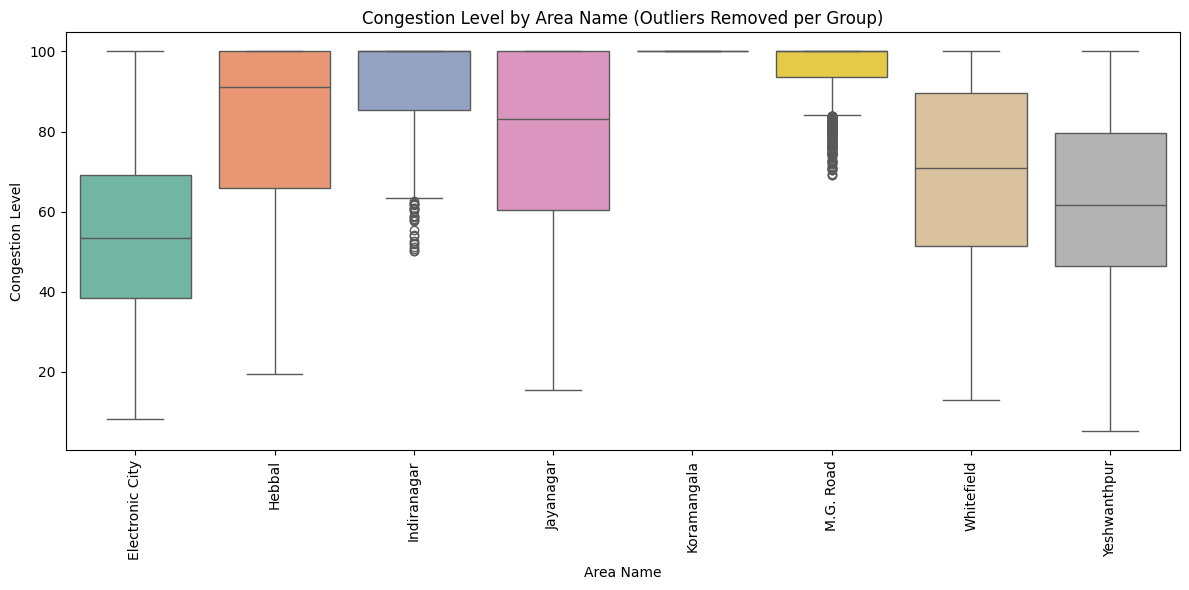

In [34]:
def remove_outliers(group):
    Q1 = group['Congestion Level'].quantile(0.25)
    Q3 = group['Congestion Level'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['Congestion Level'] >= lower) & (group['Congestion Level'] <= upper)]


df_no_outliers = df.groupby('Area Name').apply(remove_outliers).reset_index(drop=True)


plt.figure(figsize=(12, 6))
sns.boxplot(x='Area Name', y='Congestion Level', data=df_no_outliers, palette='Set2')
plt.title('Congestion Level by Area Name (Outliers Removed per Group)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


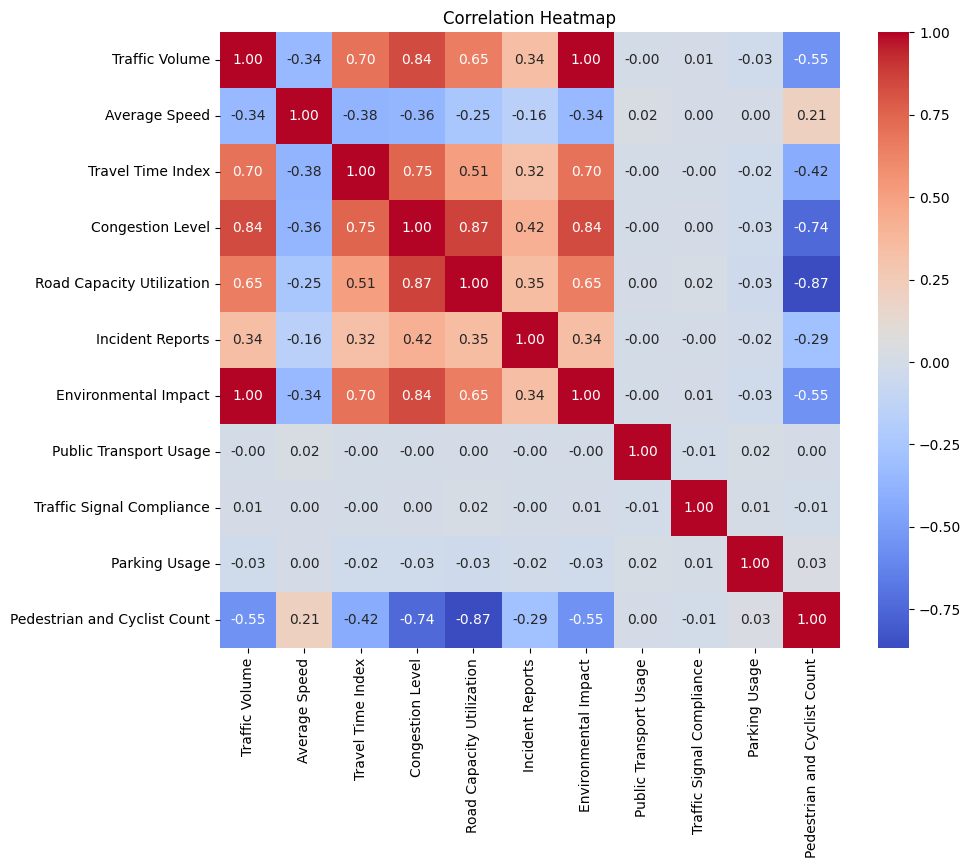

In [35]:
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


<Figure size 1200x1000 with 0 Axes>

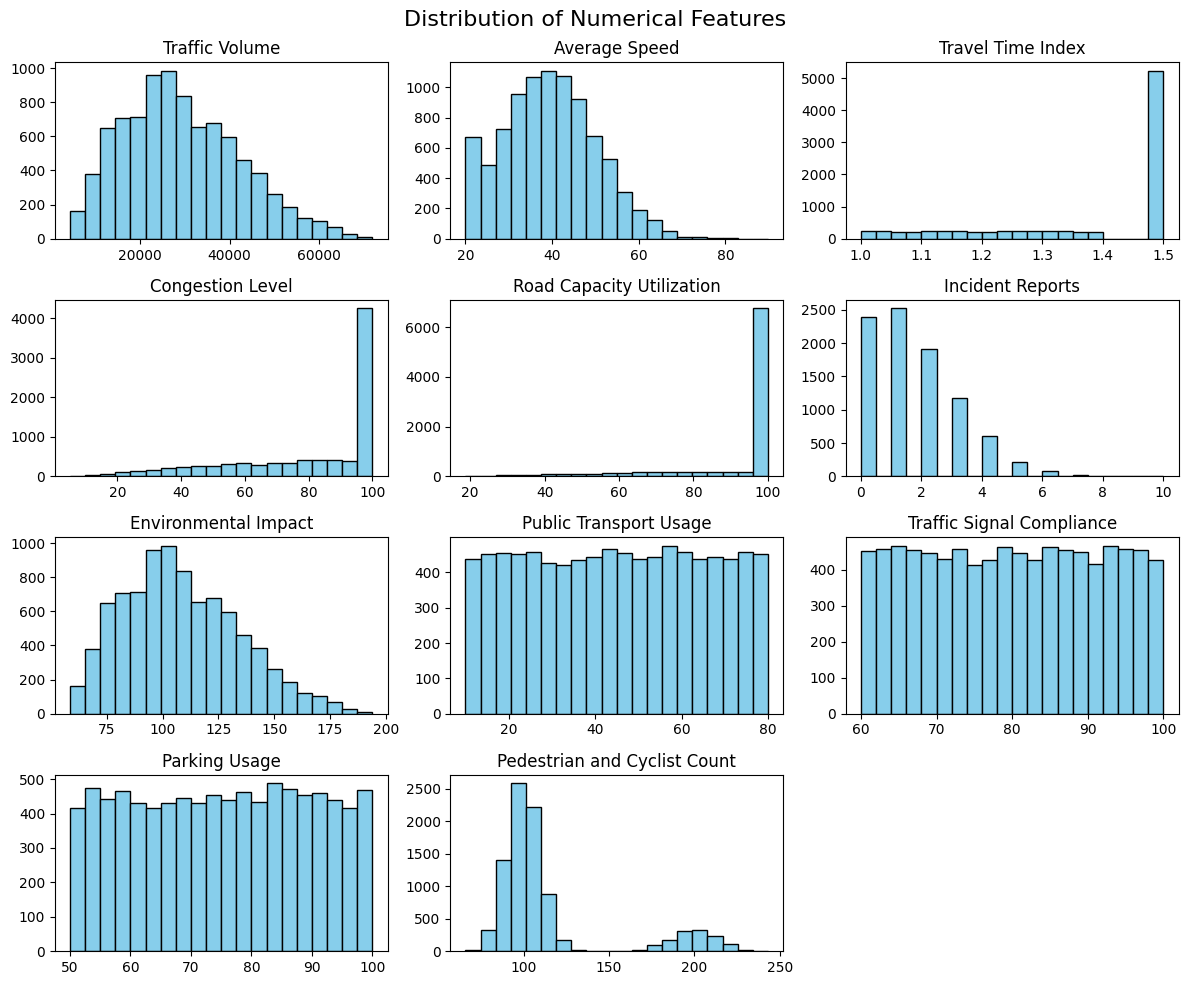

In [36]:
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
df_numeric.hist(bins=20, figsize=(12, 10), grid=False, color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


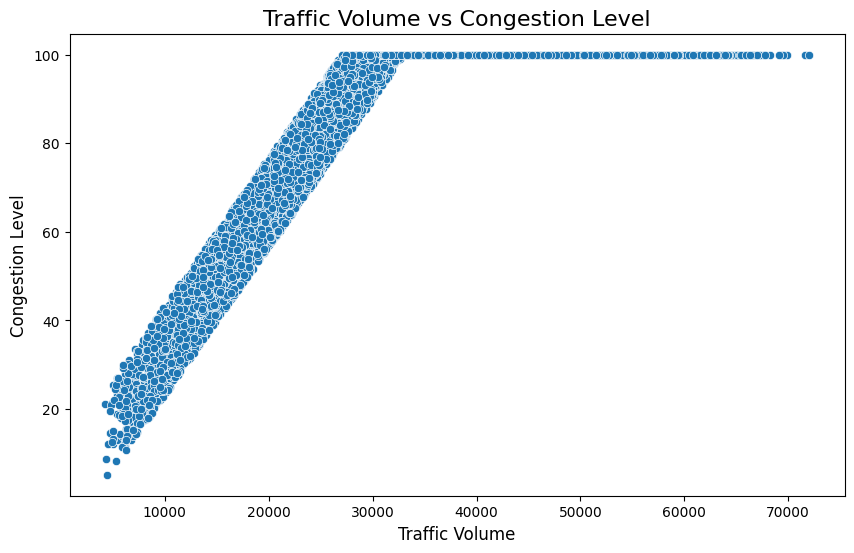

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Traffic Volume', y='Congestion Level', data=df)
plt.title('Traffic Volume vs Congestion Level', fontsize=16)
plt.xlabel('Traffic Volume', fontsize=12)
plt.ylabel('Congestion Level', fontsize=12)
plt.show()

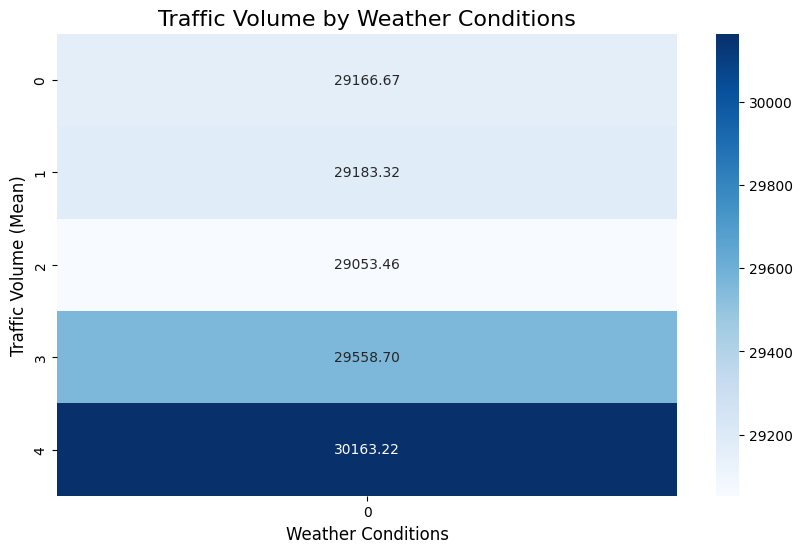

In [38]:
plt.figure(figsize=(10, 6))
weather_conditions = df['Weather Conditions'].value_counts().index
sns.heatmap(df[df['Weather Conditions'].isin(weather_conditions)].groupby('Weather Conditions')['Traffic Volume'].mean().values.reshape(-1, 1), annot=True, fmt='.2f', cmap='Blues')
plt.title('Traffic Volume by Weather Conditions', fontsize=16)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Traffic Volume (Mean)', fontsize=12)
plt.show()

In [39]:

df['Weather Conditions'] = df['Weather Conditions'].astype('category').cat.codes
df['Roadwork and Construction Activity'] = df['Roadwork and Construction Activity'].map({'No': 0, 'Yes': 1})
df['Date'] = pd.to_datetime(df['Date'])


df_encoded = df.drop(['Date', 'Area Name', 'Road/Intersection Name'], axis=1)


In [40]:
df_encoded.isnull().sum()

,0
Traffic Volume,0
Average Speed,0
Travel Time Index,0
Congestion Level,0
Road Capacity Utilization,0
Incident Reports,0
Environmental Impact,0
Public Transport Usage,0
Traffic Signal Compliance,0
Parking Usage,0


### Regression: Predict Congestion Level

In [47]:

X_reg = df_encoded.drop('Congestion Level', axis=1)
y_reg = df_encoded['Congestion Level']


X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)


y_pred_reg = regressor.predict(X_test)


mae = mean_absolute_error(y_test, y_pred_reg)
mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

print("Regression Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Regression Metrics:
MAE: 2.87
MSE: 18.95
R² Score: 0.96


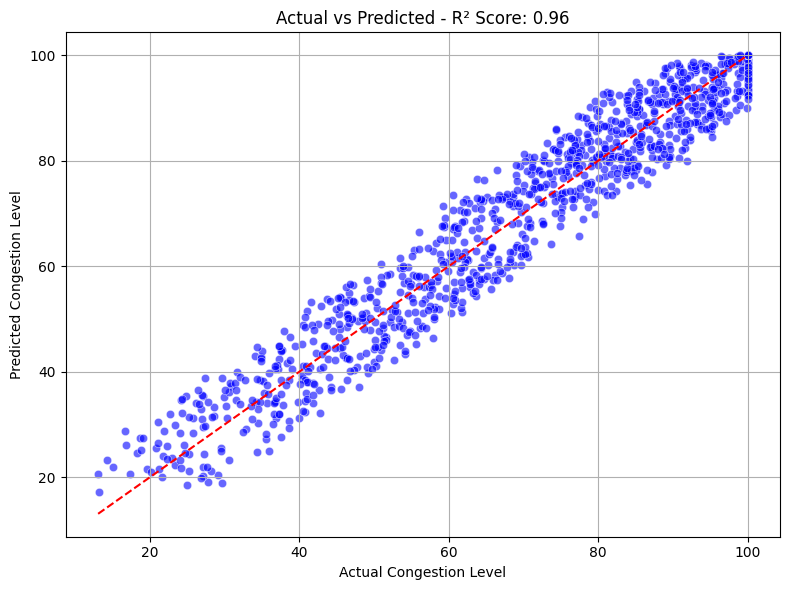

In [48]:
plt.figure(figsize=(8, 6))


sns.scatterplot(x=y_test, y=y_pred_reg, color='blue', alpha=0.6)


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.title(f"Actual vs Predicted - R² Score: {r2:.2f}")
plt.xlabel("Actual Congestion Level")
plt.ylabel("Predicted Congestion Level")
plt.grid(True)
plt.tight_layout()


plt.show()


### Classification: Categorize Congestion Level (Low, Medium, High)

In [49]:

df_encoded['Congestion_Class'] = pd.cut(df_encoded['Congestion Level'],
                                         bins=[-1, 33, 66, 100],
                                         labels=['Low', 'Medium', 'High'])


df_encoded['Congestion_Class'] = df_encoded['Congestion_Class'].astype('category').cat.codes


X_clf = df_encoded.drop(['Congestion Level', 'Congestion_Class'], axis=1)
y_clf = df_encoded['Congestion_Class']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clf)
X_test_scaled = scaler.transform(X_test_clf)


In [50]:
classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

classifier.fit(X_train_scaled, y_train_clf)

y_pred_clf = classifier.predict(X_test_scaled)


In [51]:

accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')

print("Classification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Classification Metrics:
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


In [52]:


print("Classification Report:")
print(classification_report(y_test_clf, y_pred_clf, target_names=['Low', 'Medium', 'High']))


Classification Report:
              precision    recall  f1-score   support

         Low       0.76      0.68      0.72        84
      Medium       0.86      0.84      0.85       370
        High       0.97      0.98      0.98      1334

    accuracy                           0.94      1788
   macro avg       0.86      0.83      0.85      1788
weighted avg       0.94      0.94      0.94      1788



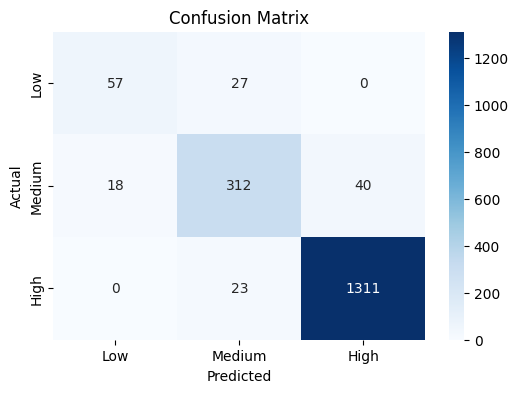

In [53]:


cm = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

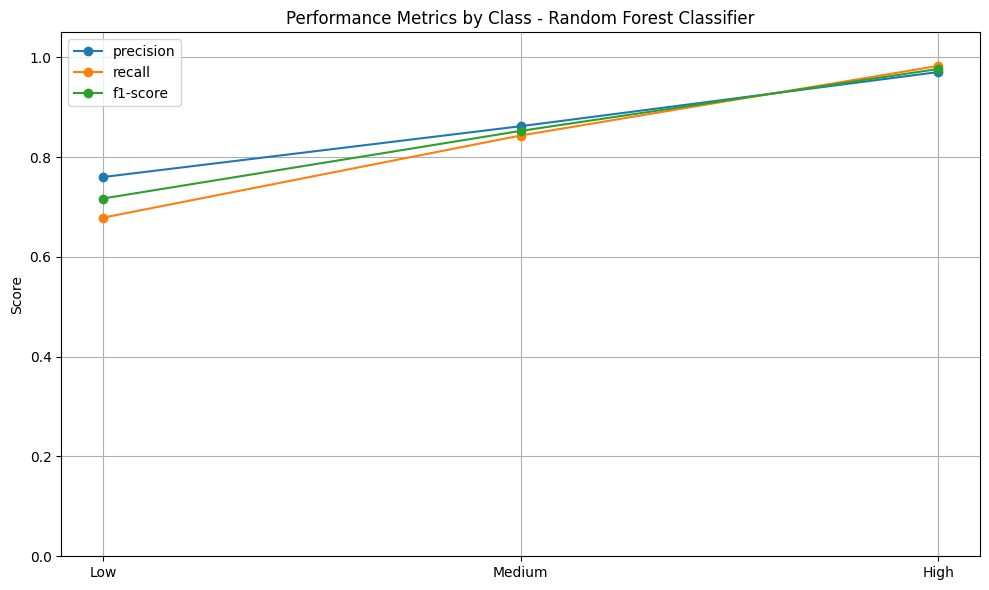

In [54]:
report = classification_report(y_test_clf, y_pred_clf, target_names=['Low', 'Medium', 'High'],output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
scores = {metric: [report[cls][metric] for cls in ['Low', 'Medium', 'High']] for metric in metrics}
classes = ['Low', 'Medium', 'High']

plt.figure(figsize=(10, 6))
for metric, values in scores.items():
    plt.plot(classes, values, marker='o', label=metric)

plt.title("Performance Metrics by Class - Random Forest Classifier")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

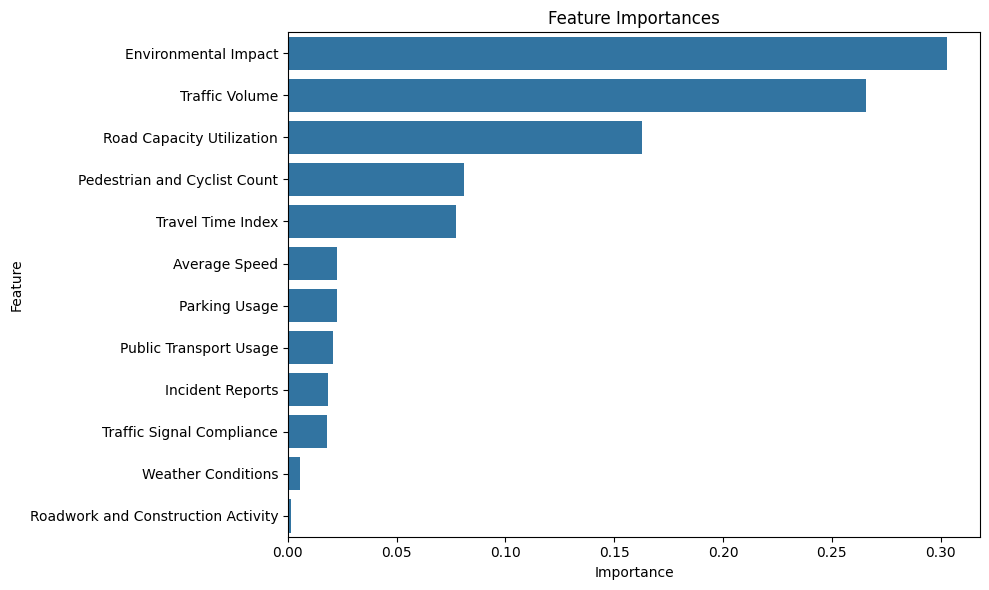

In [55]:
importances = classifier.feature_importances_
feature_names = X_clf.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


#### Hyperparameter Tuning for the Random Forest Classifier

In [56]:


param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None],
    'random_state': [42]
}

classifier = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_scaled, y_train_clf)

print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_rf.best_score_)

best_rf_classifier = grid_search_rf.best_estimator_
y_pred_rf = best_rf_classifier.predict(X_test_scaled)

print("Classification Report (Tuned Random Forest):")
print(classification_report(y_test_clf, y_pred_rf, target_names=['Low', 'Medium', 'High']))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
Best Cross-Validated Accuracy: 0.9423602989033361
Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

         Low       0.80      0.65      0.72        84
      Medium       0.86      0.86      0.86       370
        High       0.97      0.98      0.98      1334

    accuracy                           0.94      1788
   macro avg       0.88      0.83      0.85      1788
weighted avg       0.94      0.94      0.94      1788



### LogisticRegression

In [57]:


log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    class_weight='balanced',
    max_iter=3000,
    random_state=42
)

log_reg.fit(X_train_scaled, y_train_clf)
y_pred_log = log_reg.predict(X_test_scaled)


report=classification_report(y_test_clf, y_pred_log, target_names=['Low', 'Medium', 'High'],output_dict=True)

print("Classification Report (Logistic Regression):")

print(report)




Classification Report (Logistic Regression):
{'Low': {'precision': 0.626984126984127, 'recall': 0.9404761904761905, 'f1-score': 0.7523809523809524, 'support': 84.0}, 'Medium': {'precision': 0.875, 'recall': 0.8135135135135135, 'f1-score': 0.8431372549019608, 'support': 370.0}, 'High': {'precision': 0.9833080424886191, 'recall': 0.9715142428785607, 'f1-score': 0.9773755656108597, 'support': 1334.0}, 'accuracy': 0.9373601789709173, 'macro avg': {'precision': 0.8284307231575821, 'recall': 0.9085013156227549, 'f1-score': 0.8576312576312577, 'support': 1788.0}, 'weighted avg': {'precision': 0.9441552546680563, 'recall': 0.9373601789709173, 'f1-score': 0.9390267275383738, 'support': 1788.0}}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [58]:

accuracy = accuracy_score(y_test_clf, y_pred_log)
precision = precision_score(y_test_clf, y_pred_log, average='weighted')
recall = recall_score(y_test_clf, y_pred_log, average='weighted')
f1 = f1_score(y_test_clf, y_pred_log, average='weighted')

print("Classification Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Classification Metrics:
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


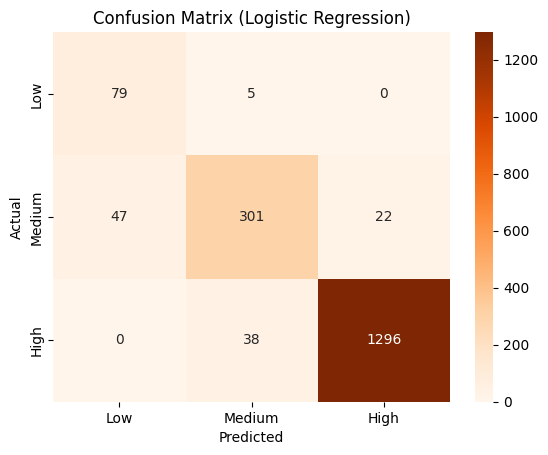

In [59]:
cm = confusion_matrix(y_test_clf, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()


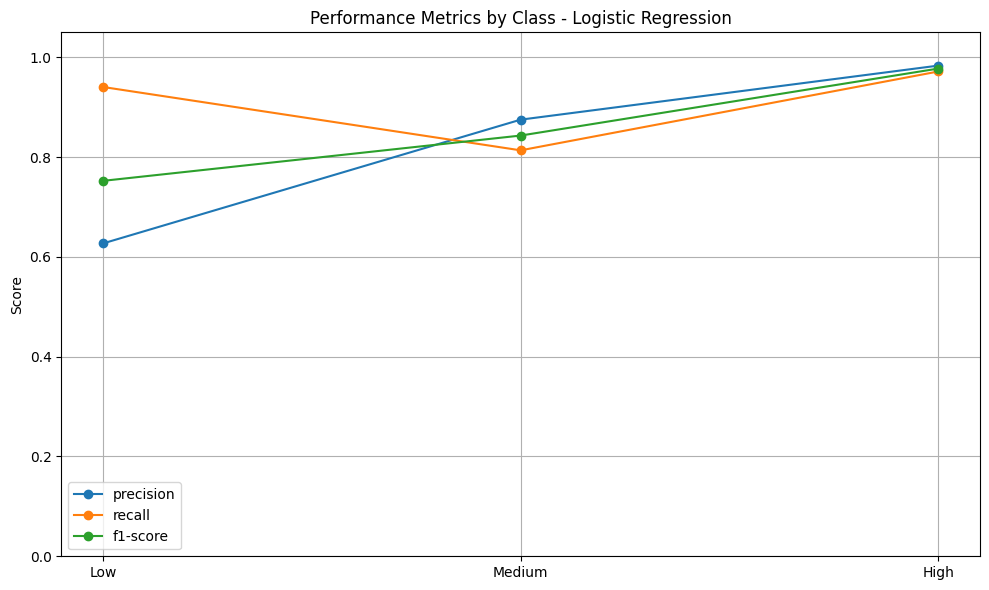

In [60]:
metrics = ['precision', 'recall', 'f1-score']
scores = {metric: [report[cls][metric] for cls in ['Low', 'Medium', 'High']] for metric in metrics}
classes = ['Low', 'Medium', 'High']

plt.figure(figsize=(10, 6))
for metric, values in scores.items():
    plt.plot(classes, values, marker='o', label=metric)

plt.title("Performance Metrics by Class - Logistic Regression")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Hyperparameter Tuning for the Logistic Regression

In [61]:

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [1000, 3000, 5000],
    'class_weight': ['balanced', None]
}

log_reg = LogisticRegression(multi_class='multinomial', random_state=42)

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train_clf)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_log_reg = grid_search.best_estimator_
y_pred_log = best_log_reg.predict(X_test_scaled)

print("Classification Report (Tuned Logistic Regression):")
print(classification_report(y_test_clf, y_pred_log, target_names=['Low', 'Medium', 'High']))



Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters: {'C': 10, 'class_weight': None, 'max_iter': 1000, 'solver': 'saga'}
Best Cross-Validated Accuracy: 0.942639725564848
Classification Report (Tuned Logistic Regression):
              precision    recall  f1-score   support

         Low       0.79      0.71      0.75        84
      Medium       0.87      0.85      0.86       370
        High       0.97      0.98      0.98      1334

    accuracy                           0.94      1788
   macro avg       0.88      0.85      0.86      1788
weighted avg       0.94      0.94      0.94      1788



#### LSTM Model

In [62]:
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [63]:

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 output classes
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_clf, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_clf), verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7644 - loss: 0.7803 - val_accuracy: 0.9189 - val_loss: 0.2400
Epoch 2/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9114 - loss: 0.2182 - val_accuracy: 0.9245 - val_loss: 0.1728
Epoch 3/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9370 - loss: 0.1598 - val_accuracy: 0.9390 - val_loss: 0.1494
Epoch 4/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9396 - loss: 0.1420 - val_accuracy: 0.9418 - val_loss: 0.1389
Epoch 5/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9462 - loss: 0.1368 - val_accuracy: 0.9385 - val_loss: 0.1352
Epoch 6/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9363 - loss: 0.1371 - val_accuracy: 0.9396 - val_loss: 0.1321
Epoch 7/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9405 - loss: 0.1318 - val_accuracy: 0.9374 - val_loss: 0.1326
Epoch 8/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9458 - loss: 0.1302 - val_accuracy: 0.

In [64]:

y_pred_lstm_raw = model.predict(X_test_scaled)
y_pred_lstm = np.argmax(y_pred_lstm_raw, axis=1)


report = classification_report(y_test_clf, y_pred_lstm, target_names=['Low', 'Medium', 'High'], output_dict=True)

print("Classification Report (LSTM):")
print( classification_report(y_test_clf, y_pred_lstm, target_names=['Low', 'Medium', 'High']))


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Classification Report (LSTM):
              precision    recall  f1-score   support

         Low       0.74      0.67      0.70        84
      Medium       0.86      0.85      0.85       370
        High       0.97      0.98      0.98      1334

    accuracy                           0.94      1788
   macro avg       0.86      0.83      0.84      1788
weighted avg       0.94      0.94      0.94      1788



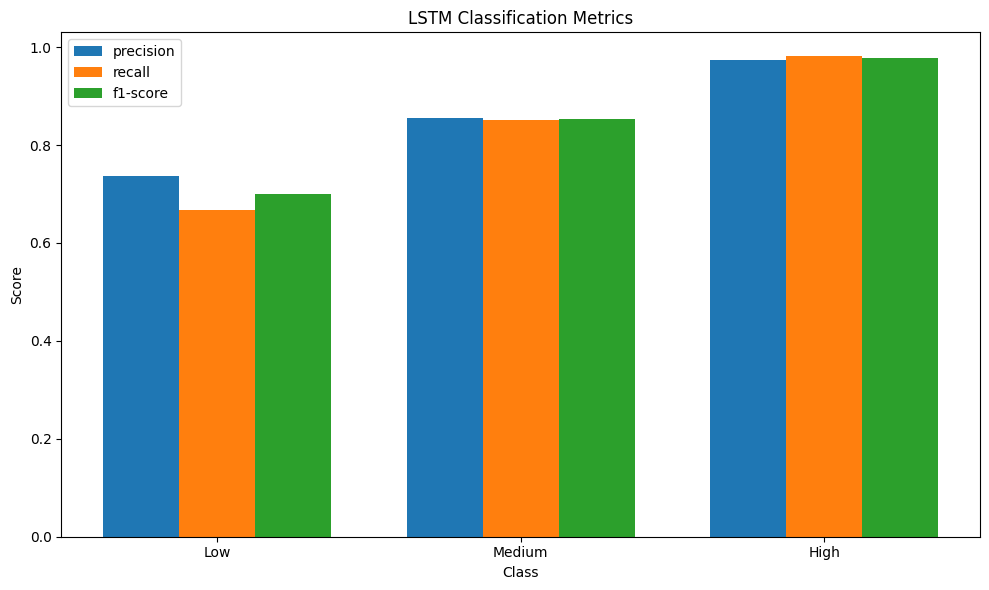

In [65]:


metrics = ['precision', 'recall', 'f1-score']
scores = {metric: [report[cls][metric] for cls in ['Low', 'Medium', 'High']] for metric in metrics}
classes = ['Low', 'Medium', 'High']

plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(classes)) + i * 0.25, scores[metric], width=0.25, label=metric)

plt.xticks(np.arange(len(classes)) + 0.25, classes)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('LSTM Classification Metrics')
plt.legend()
plt.tight_layout()
plt.show()


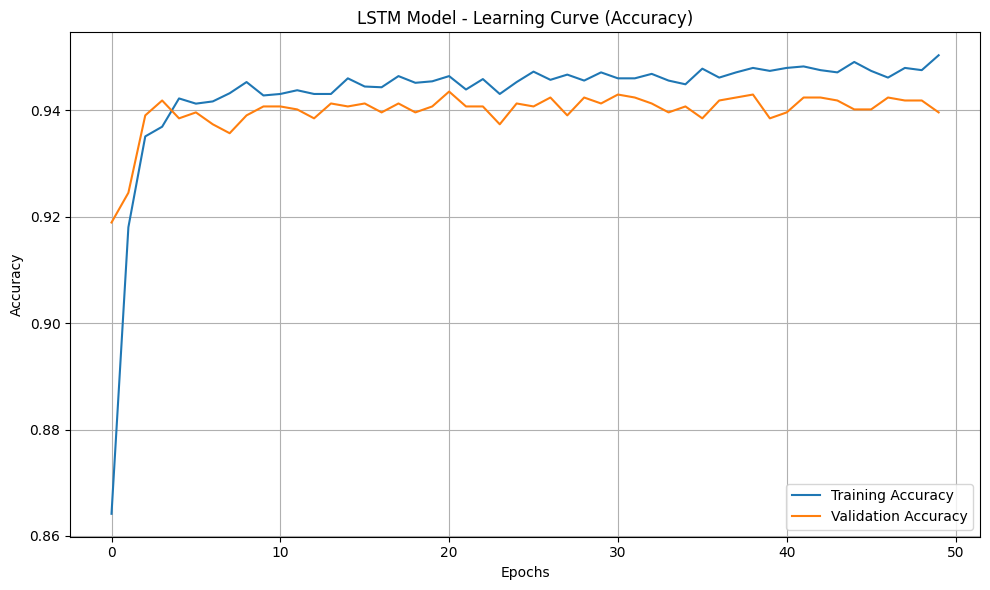

In [66]:

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('LSTM Model - Learning Curve (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


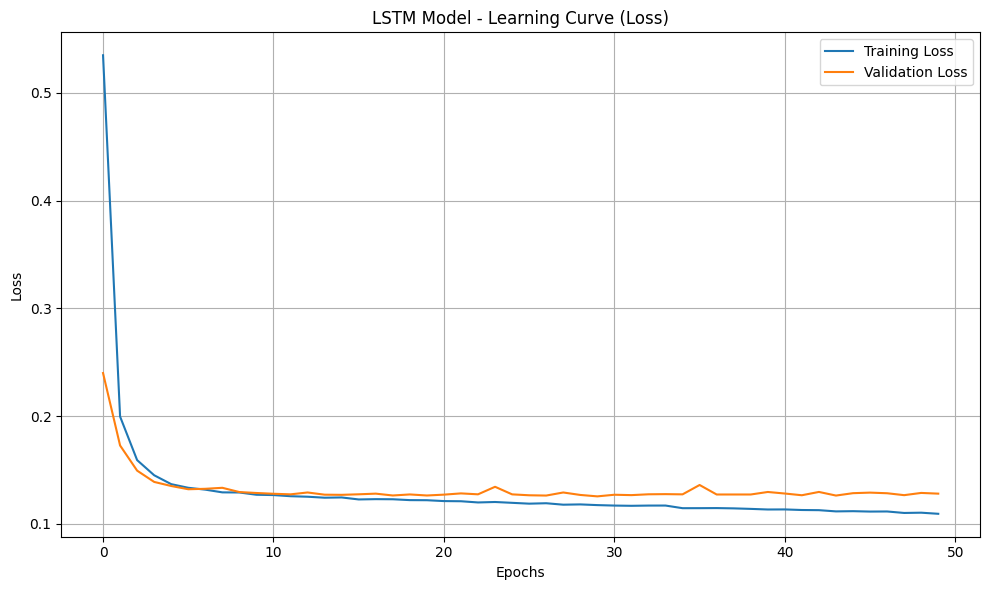

In [67]:

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('LSTM Model - Learning Curve (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
